In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraires
import seaborn as sns
import matplotlib.pyplot as plt

# show plot in the notebook
%matplotlib inline

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

In [2]:
iris.head(
)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Check basic description for features
#iris.drop(['sepal_length','species'], axis=1).describe()

In [5]:
# Check the response variable frequency
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

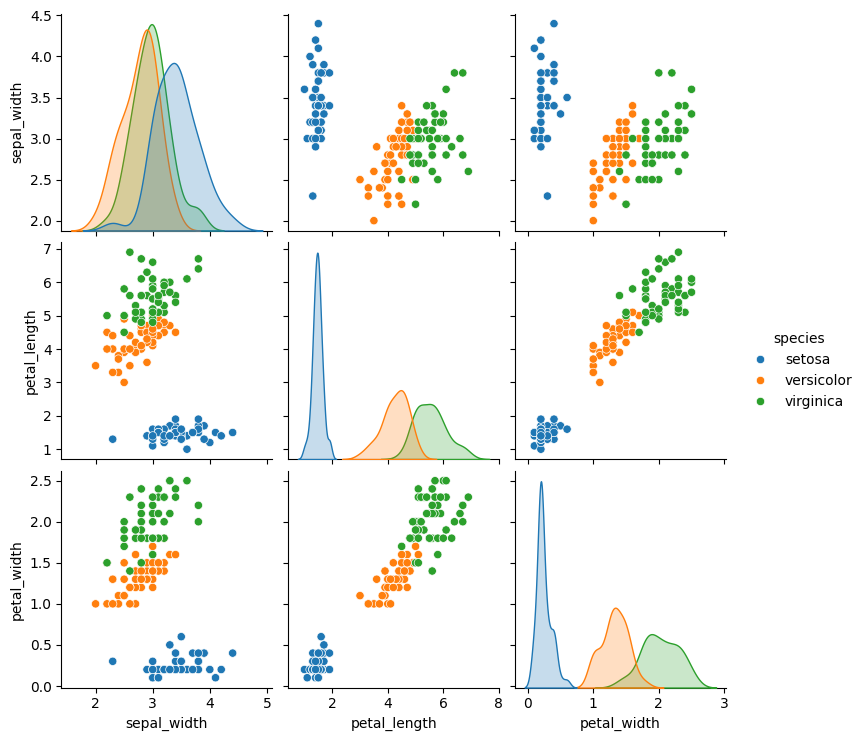

In [6]:
# Create a pairplot of the data set. Which flower species seems to be the most separable?
sns.pairplot(iris.drop(['sepal_length'], axis=1),hue='species')
# Iris setosa seems most separable from the other two species

/var/folders/fn/7h3vhz2124g7vqdxv229dn1r0000gn/T/ipykernel_17588/2311516437.py:1: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sub[['petal_length','petal_width']],cmap="plasma", shade=True, shade_lowest=False)
/var/folders/fn/7h3vhz2124g7vqdxv229dn1r0000gn/T/ipykernel_17588/2311516437.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sub[['petal_length','petal_width']],cmap="plasma", shade=True, shade_lowest=False)


Text(0, 0.5, 'petal_width')

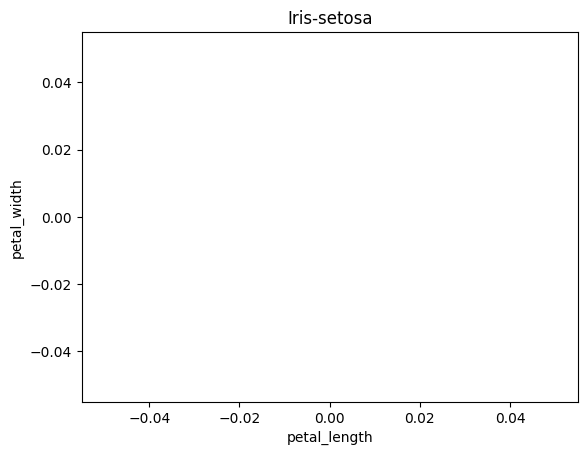

In [23]:
sns.kdeplot(data=sub[['petal_length','petal_width']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

/var/folders/fn/7h3vhz2124g7vqdxv229dn1r0000gn/T/ipykernel_17588/2599409048.py:3: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sub[['sepal_length','sepal_width']],cmap="plasma", shade=True, shade_lowest=False)
/var/folders/fn/7h3vhz2124g7vqdxv229dn1r0000gn/T/ipykernel_17588/2599409048.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sub[['sepal_length','sepal_width']],cmap="plasma", shade=True, shade_lowest=False)


Text(0, 0.5, 'sepal_width')

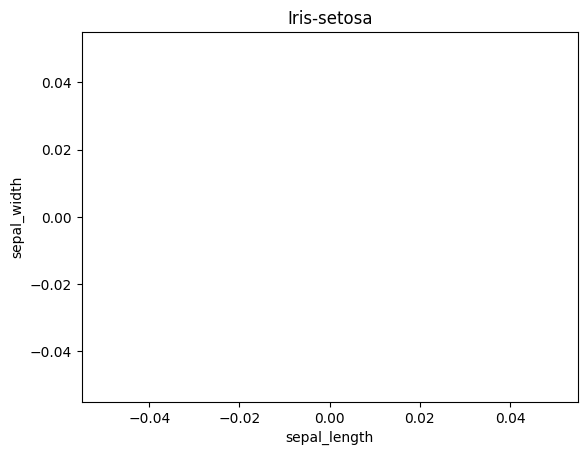

In [7]:
# Create a kde plot of sepal_length versus sepal width for setosa species of flower.
sub=iris[iris['species']=='Iris-setosa']
sns.kdeplot(data=sub[['sepal_length','sepal_width']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

Text(0.5, 1.0, 'Sepal Width versus Length for virginica species')

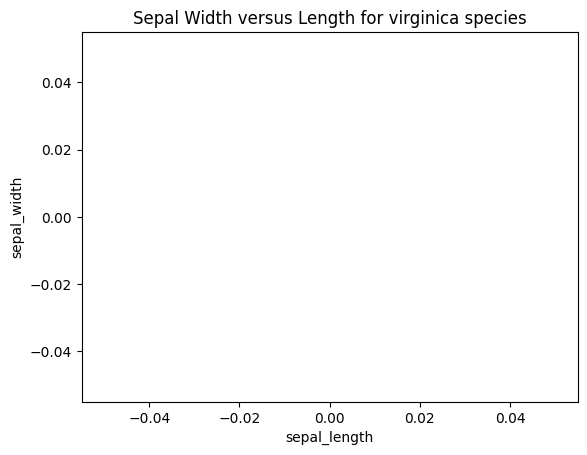

In [8]:
sub_virginica=iris[iris['species']=='Iris-virginica']
# Create a scatter plot of the Sepal
plt.scatter(sub_virginica['sepal_length'], sub_virginica['sepal_width'], marker='o', color='r')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Sepal Width versus Length for virginica species')

In [10]:
# Split data into a training set and a testing set.
# train_test_split shuffle the data before the split (shuffle=True by default)
from sklearn.model_selection import train_test_split
X=iris.drop(['species', 'sepal_length'], axis=1)
y=iris['species']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.5, shuffle=True,random_state=100)

In [11]:
# Now it's time to train a Support Vector Machine Classifier. 
# Call the SVC() model from sklearn and fit the model to the training data.
from sklearn.svm import SVC
model=SVC(C=1, kernel='rbf', tol=0.001)
model.fit(X_train, y_train)

SVC(C=1)

In [12]:
# Now get predictions from the model and create a confusion matrix and a classification report.
pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred))

[[28  0  0]
 [ 0 17  0]
 [ 0  4 26]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.81      1.00      0.89        17
   virginica       1.00      0.87      0.93        30

    accuracy                           0.95        75
   macro avg       0.94      0.96      0.94        75
weighted avg       0.96      0.95      0.95        75



Accuracy score is:  0.9466666666666667


In [13]:
iris.head(22)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [15]:
from sklearn.utils import shuffle
X=iris.drop('species', axis=1)
y=iris['species']
print('Before shuffle: ',y[0:20])
X,y = shuffle(X,y, random_state=0)
print("After shuffle: ", y[0:20])

Before shuffle:  0     setosa
1     setosa
2     setosa
3     setosa
4     setosa
5     setosa
6     setosa
7     setosa
8     setosa
9     setosa
10    setosa
11    setosa
12    setosa
13    setosa
14    setosa
15    setosa
16    setosa
17    setosa
18    setosa
19    setosa
Name: species, dtype: object
After shuffle:  114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
100     virginica
40         setosa
86     versicolor
76     versicolor
71     versicolor
134     virginica
51     versicolor
73     versicolor
54     versicolor
63     versicolor
37         setosa
78     versicolor
90     versicolor
45         setosa
16         setosa
Name: species, dtype: object


In [16]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=1, refit=True )
grid.fit(X, y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [17]:
# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, gamma=0.01)
Mean cross-validated score of the best_estimator:  0.9933333333333333
The number of cross-validation splits (folds/iterations):  3


In [20]:
# Another optition for shuffle is to use cv=KFold, we get 98% accuracy
from sklearn.model_selection import KFold
X=iris.drop(['species', 'sepal_length'], axis=1)
y=iris['species']
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',
                  cv=KFold(n_splits=3, shuffle=True, random_state=0), verbose=1, refit=True )
grid.fit(X, y)

# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
Mean cross-validated score of the best_estimator:  0.9733333333333333
The number of cross-validation splits (folds/iterations):  3
